<a href="https://colab.research.google.com/github/eugenie-kim012/Daily-Log/blob/main/19th_MAY_2025_PCA%20%26%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [비지도 학습]

차원축소
feature가 많을수록 데이터의 차원이 커지게 되는데, 데이터셋의 크기에 비해 feature가 많아질 경우 이를 표현하기 위한 변수가 많아져 모델의 복잡성이 증가되고 과적합 문제가 발생되기도 합니다.
이러한 문제를 해결하기 위해 차원 축소 방법이 사용되고 있습니다.
*용어: 차원이란? 데이터 포인트를 공간에 표현하기 위해 필요한 최소한의 축의 개수

PCA(Principal Component Analysis)

차원 축소 기법 중 대표적인 기법
고차원에서 저차원으로 축소하는 선형 투영 기법
데이터의 차원이 증가할 수록 거리가 증가하고, 오버피팅 가능성이 커짐
PCA 단계

데이터에서 분산이 최대인 축을 찾음 (첫번째 축)
첫번째 축과 직교하면서 분산이 최대인 축을 찾음 (두번째 축)
첫번째와 두번째 축에 직교하고, 분산이 최대인 축을 찾음 (세번째 축)

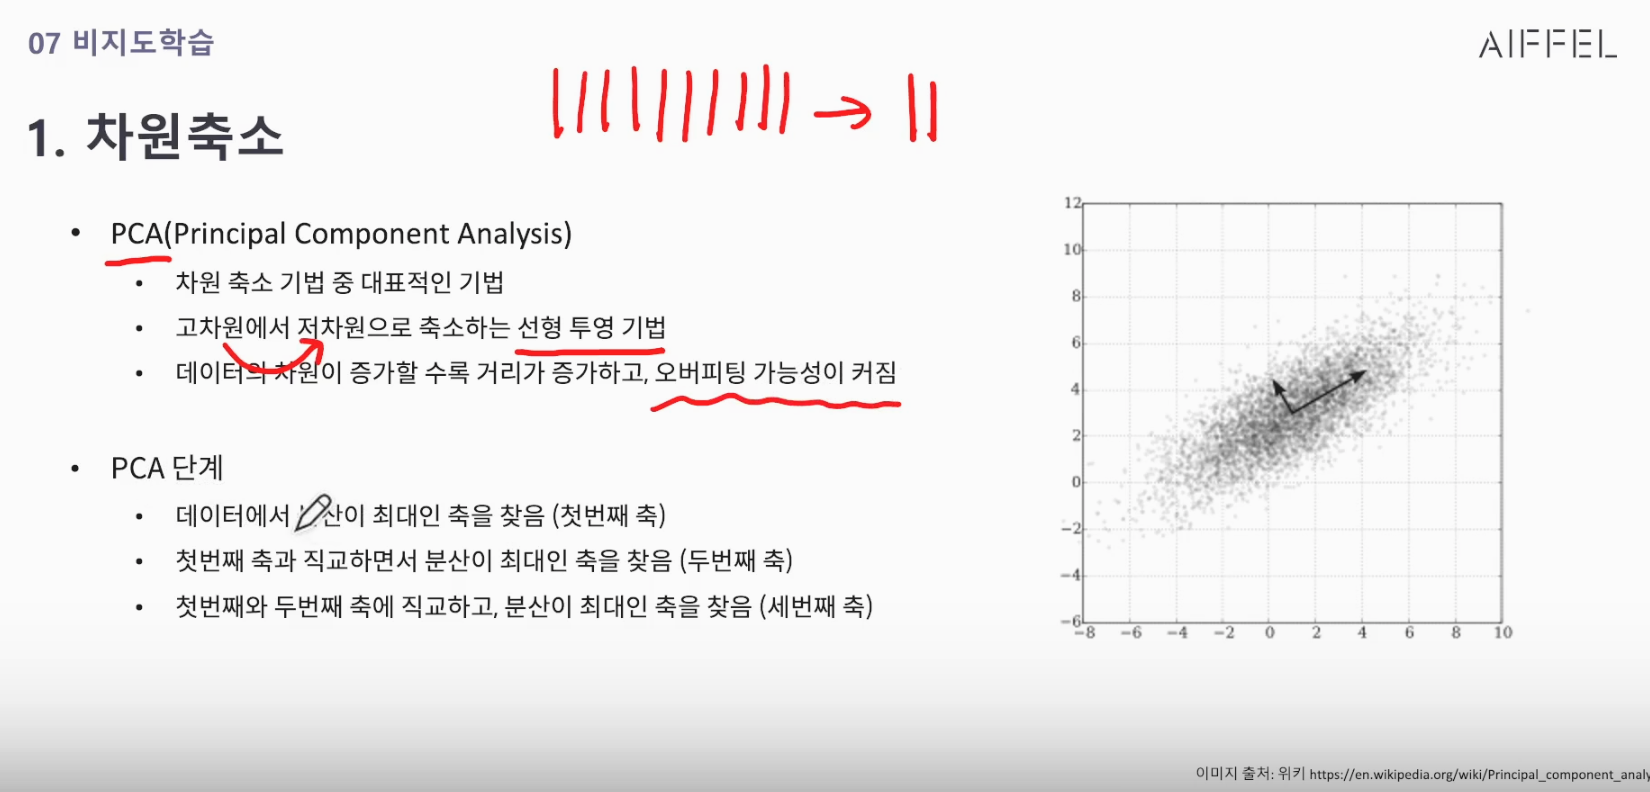

In [1]:
# 라이브러리 불러오기
import pandas as pd

In [2]:
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [3]:
# 데이터 샘플 확인
print(data.shape)
data.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
data.shape
#PCA 전에 scaling 작업 수행하기

(178, 13)

## 1. 스탠다드 스케일링
특성별로 데이터 스케일이 다를 경우 머신러닝 모델이 원활하게 작동하는 데 어려움을 겪을 수 있어 데이터 스케일링을 통해 데이터 값의 범위나 분포를 같게 만들어줘야 합니다.
스탠다드 스케일링은 데이터 스케일링의 한 종류로서 데이터가 표준 정규 분포를 갖도록 스케일링합니다. (평균 0, 분산 1로 변경하여 모든 특성들이 같은 스케일을 갖도록 한다.)

In [5]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data) #data를 fit, transformation 하는 과정
data[:3] # 샘플로 3개 정도만 확인하는 작업

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818]])

In [6]:
# 데이터 복사 (df변수)
df = data.copy()

## **PCA**
2차원이나 3차원으로 축소할 경우 시각화가 가능하다는 장점이 있음

In [7]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA

In [8]:
# 데이터 크기 확인
df.shape

(178, 13)

In [9]:
# PCA
pca = PCA(n_components=2) #13개의 피쳐를 2개로 줄이기 (차원을 축소하였음)

In [10]:
# PCA 변환
df = pca.fit_transform(df)

In [11]:
# 데이터 크기 확인
df.shape #2로 축소가 된 것을 확인할 수있음

(178, 2)

In [12]:
# 샘플 데이터 확인
df[:3]

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ]])

## 3. PCA(2차원) 시각화


In [13]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [14]:
# 데이터 프레임 변환
df = pd.DataFrame(df) #df를 Dataframe 형태로 변환하였음
df.head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


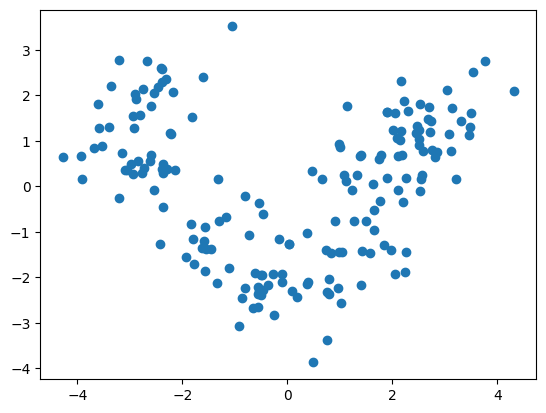

In [15]:
# scatter
plt.scatter(df.iloc[:,0], df.iloc[:,1]) #x 축 그리고 y축으로 들어갈 데이터를 변환하였음

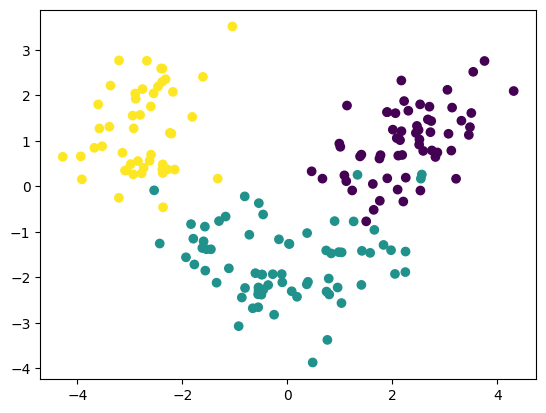

In [16]:
# scatter (c=target)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target) #색을 넣음

In [17]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.36198848 0.1920749 ]
0.5540633835693526


4. 지도 학습 (PCA 전후 비교)


In [18]:
# PCA후 데이터로 머신러닝 (2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df, dataset.target, scoring='accuracy', cv=5).mean()

np.float64(0.9492063492063492)

In [19]:
# PCA전 데이터로 머신러닝 (13) - PCA 전 후 데이터를 비교해 보았을 때, 크게 차이가 존재하지는 않는 다는 것 확인 (피쳐들의 특징을 여전히 가지고 있음)
cross_val_score(model, data, dataset.target, scoring='accuracy', cv=5).mean()

np.float64(0.9553968253968254)

5. PCA(3차원) 시각화


In [20]:
# 새 데이터 복사
df = data.copy()

In [21]:
# pca (n_components=3)
pca = PCA(n_components=3) #3차원 비교, 2 대신 3을 씀

In [22]:
# pca 변환
df = pca.fit_transform(df)

In [23]:
# 데이터 프레임 변환
df = pd.DataFrame(df)

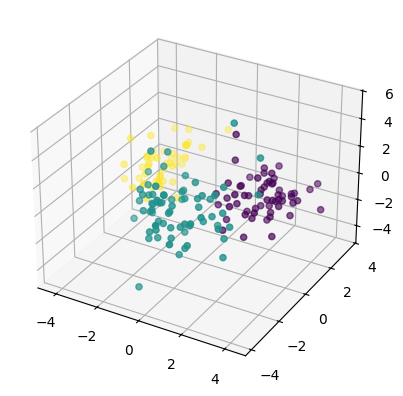

In [24]:
# 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D #3차원 시각화를 위한 라이브러리
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:,0], df.iloc[:,1],df.iloc[:,2], c=dataset.target)

## **6. 점진적 PCA**
데이터 셋이 큰 경우 활용 (배치를 통해 점직전 수행)





In [25]:
# 라이브러리 불러오기
from sklearn.decomposition import IncrementalPCA

In [26]:
# 데이터 복사
df = data.copy()

In [27]:
# 점진적 PCA
pca = IncrementalPCA(n_components=2, batch_size=16)

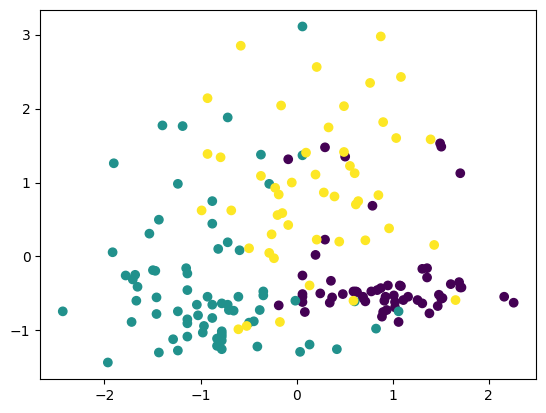

In [28]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

In [29]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

AttributeError: 'IncrementalPCA' object has no attribute 'explained_variance_ratio_'

 희소PCA
적절한 희소성을 유지 (alpha값으로 조정)
오버피팅 방지

In [ ]:
# 라이브러리 불러오기
from sklearn.decomposition import SparsePCA

In [ ]:
# 데이터 복사
df = data.copy()

In [ ]:
# 희소 PCA
pca = SparsePCA(n_components=2, alpha=0.01)#희소 PCA의 경우 알파값 입력 필요함

In [ ]:
# 희소 PCA 변환
df = pca.fit_transform(df)

In [ ]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

8. 커널PCA
비선형으로 차원축소

In [ ]:
# 라이브러리 불러오기
from sklearn.decomposition import KernelPCA

In [ ]:
# 데이터 복사
df = data.copy()

In [ ]:
# 커널 PCA
pca = KernelPCA(n_components=2)

In [ ]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)

9. SVD(Singular Value Decomposition) 특이값 분해
행렬을 특정한 구조로 분해하는 방식
신호 처리와 통계학 등의 분야에서 자주 사용됨

In [ ]:
# 라이브러리 불러오기
from sklearn.decomposition import TruncatedSVD

In [ ]:
# SVD적용
df = data.copy()
pca = TruncatedSVD(n_components=2)
df = pca.fit_transform(df)

In [ ]:
# 시각화
df = pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=dataset.target)


# 군집(클러스터링)


군집(Clustering)

군집분석은 유사성이 높은 대상의 집단을 분류하는 분석 방법
계층적 군집분석과 비계층적 군집분석 으로 구분함
전통적인 계층적 군집분석은 군집의 개수를 나중에 선정함
비계층적 군집분석인 K-means는 군집의 수를 가장 먼저 선정함
K-mean 군집분석은 초기 중심 값은 임의로 선정하며, 중심 값이 이동함
군집분석의 평가지표

Silhouette(실루엣), Dunn Index 등 활용
1. 비계층적 군집분석
대표적인 방법 K-means
K-평균군집(centroid), 임의의 지점 K개를 선택해 해당 중심에서 가까운 데이터를 군집화 하는 기법
n_clusters 하이퍼파라미터 반드시 설정

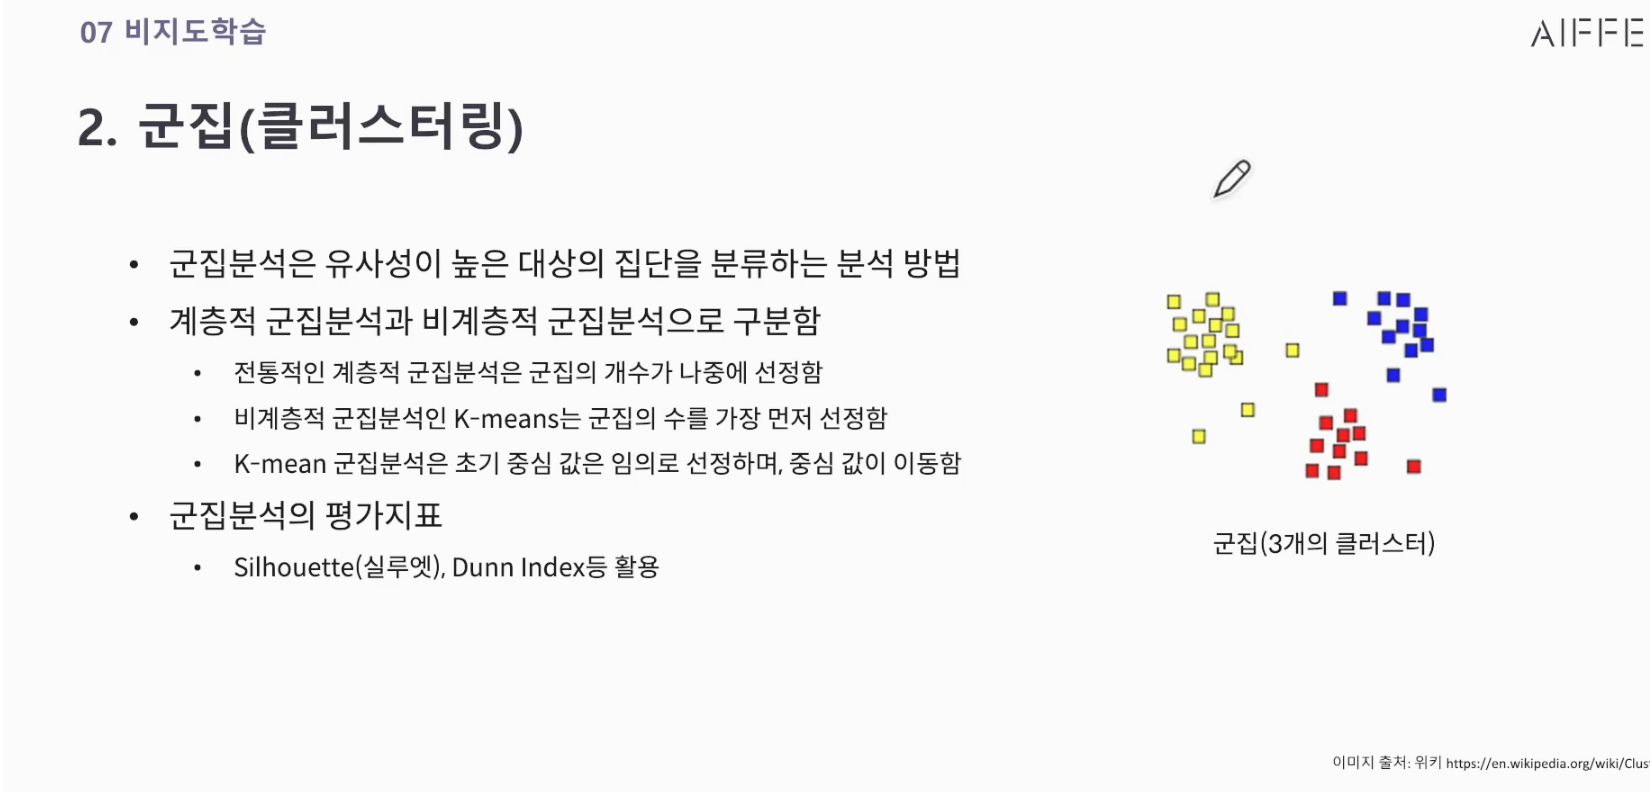

# [비 계층적 클러스터링]

In [ ]:
# KMeans 라이브러리
from sklearn.cluster import KMeans

In [ ]:
# 데이터 불러오기
from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [ ]:
# KMeans 선언 및 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

In [ ]:
# KMeans 예측
pred = kmeans.predict(df)
pred

1) PCA -> 군집 -> 시각화


In [31]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1
0,3.316751,1.443463
1,2.209465,-0.333393
2,2.516740,1.031151
3,3.757066,2.756372
4,1.008908,0.869831


In [32]:
# Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
pred = kmeans.predict(df)
df['kmeans'] = pred
df

NameError: name 'KMeans' is not defined

In [ ]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_

In [ ]:
# 시각화
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df['kmeans'])
plt.scatter(centers[:,0], centers[:,1])

2) 클러스터 개수 찾는 방법 (엘보우 방법, elbow method)

In [30]:
# 군집 수 찾기
inertia = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2022)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10),inertia) #급격한 그래프가 완만해 지는 즈음 - 클러스터의 갯수를 정하면 됨

NameError: name 'KMeans' is not defined

2. 계층적 군집분석 대표적인 방법 덴드로그램 k-means와 달리 군집 개수를 사전에 설정하지 않음 1) PCA -> 타겟별 샘플링 -> 덴드로그램
*용어 : 덴드로그램? 개체간의 결합되는 순서를 나타낸 트리 형태의 다이어그램이다.

In [33]:
# 덴드로그램
from scipy.cluster.hierarchy import dendrogram, ward

In [34]:
# PCA
df = data.copy()
pca = PCA(n_components=2)
df = pca.fit_transform(df)
df = pd.DataFrame(df)

In [37]:
# 샘플링
kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata

AttributeError: 'DataFrame' object has no attribute 'append'

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0,
   np.float64(0.9000098358130103),
   np.float64(0.9000098358130103),
   0.0],
  [0.0,
   np.float64(1.9890848214985388),
   np.float64(1.9890848214985388),
   np.float64(0.9000098358130103)]],
 'ivl': ['1', '0', '2'],
 'leaves': [1, 0, 2],
 'color_list': ['C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1']}

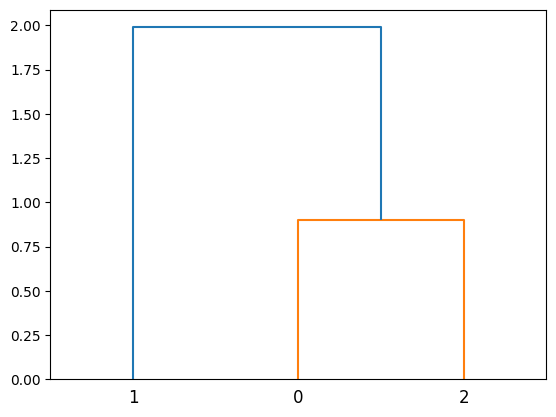

In [36]:
# 덴드로그램
linkage = ward(kdata)
dendrogram(linkage)